In [29]:
%run utils.ipynb

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits


def pca_n_components(X, y, dataset_name, n_components=[]):
    decision_tree = DecisionTreeClassifier()
    np.random.seed(5)

    pca = PCA()
    pipe = Pipeline(steps=[('pca', pca),('decision_tree',decision_tree)])

    # Plot the PCA spectrum
    pca.fit(X)

    fig, ax1 = plt.subplots()
    ax1.plot(n_components, pca.explained_variance_ratio_, label="Individual")
    ax1.plot(n_components, np.cumsum(pca.explained_variance_ratio_), label="Cumulative")
    ax1.set_ylabel('explained_variance_ratio_')

    cr = np.cumsum(pca.explained_variance_ratio_)
    cr_85_x = np.argmax(cr>0.84)
    cr_85_y = cr[cr_85_x]
    ax1.plot(cr_85_x, cr_85_y, marker='o')
    ax1.annotate("(%i, %0.2f%%)"%(cr_85_x, cr_85_y),xy=(cr_85_x, cr_85_y))

    ax2 = ax1.twinx()
    ax2.plot(n_components, pca.singular_values_, 'r-', label="Eigenvalues") #eigenvalues
    ax2.set_ylabel('Eigenvalues', color='r')


    plt.xlabel('n_components')
    plt.title("PCA Explained Variance and Eigenvalues: "+ dataset_name)


    # Prediction
    if n_components:
        estimator =  GridSearchCV(pipe,dict(pca__n_components=n_components))
        estimator.fit(X, y)
        ax1.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
                    linestyle=':', label='n_components chosen')
        
    ax1.legend(loc="best")
    plt.show()

def reconstruction_error(data):
    n_components_range = list(range(1, data['n_features']+1))
    vals = []
    for n_component in n_components_range:
        pca = PCA(n_components=n_component)
        transform = pca.fit_transform(data['X'])
        inverse = pca.inverse_transform(transform)
        _error = ((data['X'] - inverse) ** 2).mean()
        vals.append({
            'error': _error
        })
    df = pd.DataFrame(vals)
    return df
    
def plot_reconstruction_error(df):
    plt.plot(df['error'], label=data['name'])
    plt.legend()
    plt.title("Reconstruction error")
    plt.show()

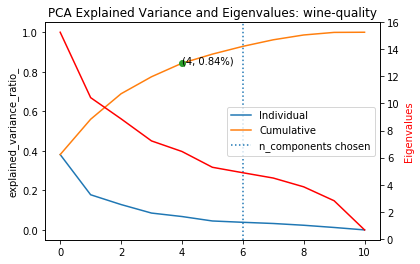

In [56]:
pca_n_components(wdata['X'], 
                 wdata['y'], 
                 wdata["name"], 
                 n_components=[2,4,6,8,10])

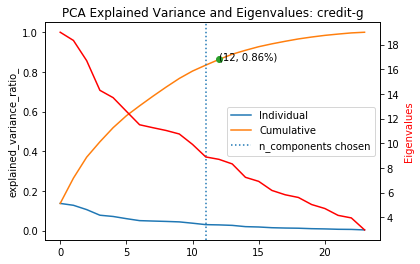

In [5]:
pca_n_components(cdata['X'], 
                 cdata['y'], 
                 cdata["name"], 
                 n_components=[10,11,12,14])

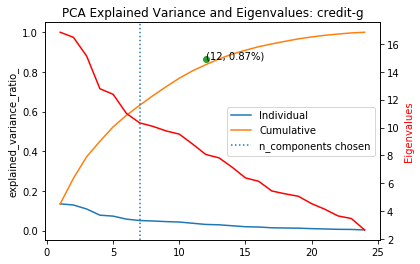

In [70]:
data=cdata
pca_n_components(data['X_train'], 
                 data['y_train'], 
                 data["name"], 
                 n_components=list(range(1, data['n_features']+1)))

In [31]:
# Set number of components as determined by the analysis
cdata['pca_n'] = 11
wdata['pca_n'] = 6

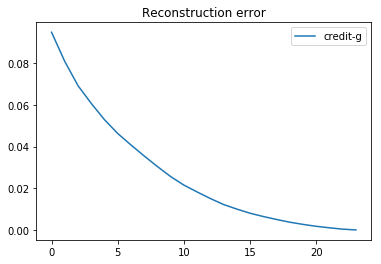

20
0


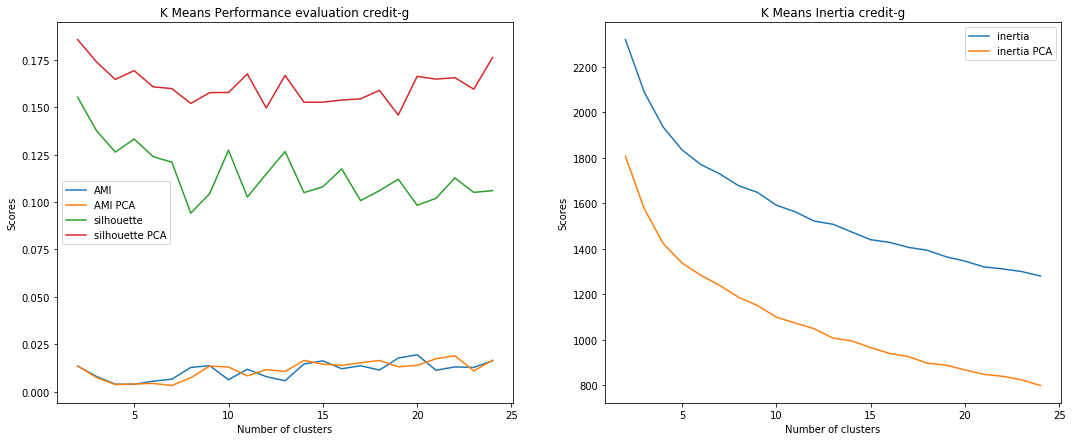

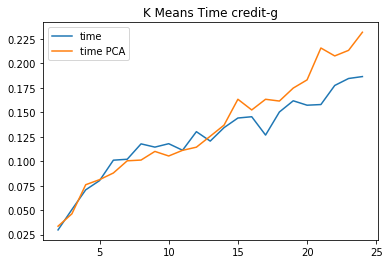

      AMI       ARI       NMI  accuracy  completeness  f1_score  homogenity  \
0  0.0136  0.051325  0.014546     0.527      0.014684  0.522151     0.01441   

       inertia       init  mutual_info  n_clusters  precision  recall  \
0  2320.844198  k-means++     0.008802           2   0.517391   0.527   

   silhouette      time  v-measure  
0     0.15531  0.033581   0.014546  
------
      AMI       ARI       NMI  accuracy  completeness  f1_score  homogenity  \
0  0.0136  0.051325  0.014546     0.527      0.014684  0.522151     0.01441   

       inertia       init  mutual_info  n_clusters  precision  recall  \
0  1807.259702  k-means++     0.008802           2   0.517391   0.527   

   silhouette      time  v-measure  
0    0.185598  0.029785   0.014546  
22
0


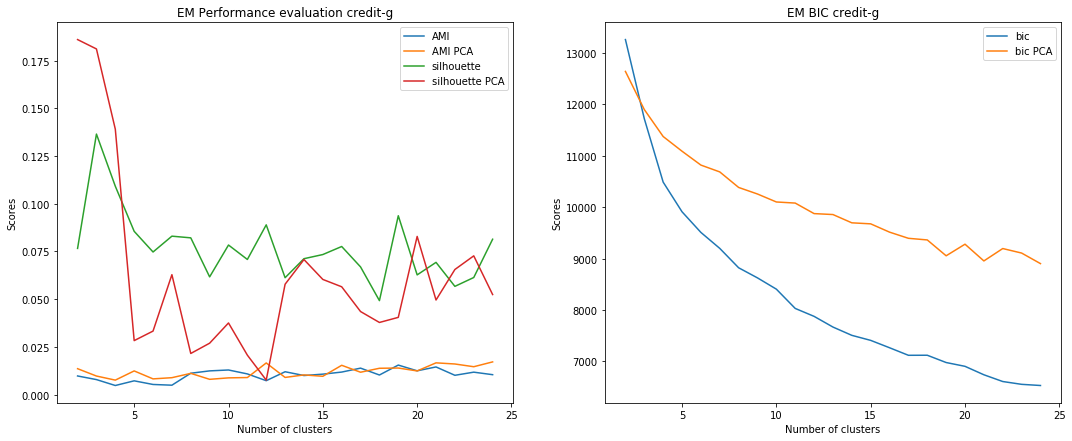

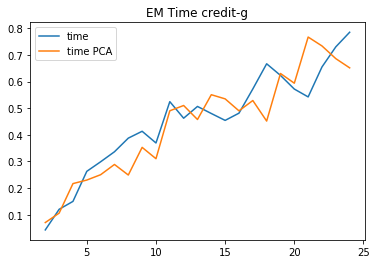

        AMI      ARI       NMI  accuracy           aic           bic  \
0  0.009766 -0.00694  0.011019     0.305  13011.834362  13262.129881   

   completeness  f1_score  homogenity    init  mutual_info  n_clusters  \
0      0.010504  0.388889    0.011559  gmm-em     0.007061           2   

   precision  recall  silhouette      time  v-measure  
0   0.536432   0.305    0.076612  0.070916   0.011006  
------
       AMI       ARI      NMI  accuracy           aic           bic  \
0  0.01358  0.051691  0.01456     0.529  12519.845919  12642.539801   

   completeness  f1_score  homogenity    init  mutual_info  n_clusters  \
0      0.014731  0.523023     0.01439  gmm-em      0.00879           2   

   precision  recall  silhouette      time  v-measure  
0   0.517179   0.529    0.186053  0.043254   0.014559  


In [47]:

data = cdata
method = "PCA"

# Reconstruction Error
dfr = reconstruction_error(cdata)
dfr.to_csv(f"./results/rerror_{method.lower()}_{data['name']}.csv", index=False )
plot_reconstruction_error(dfr)
          
# Reduce dimension
reduced_data = PCA(n_components=data['pca_n']).fit_transform(data['X'])
    
# Performances
n_clusters_range = list(range(2, data['n_features']+1))

## Kmeans
dfk = performance_k_means(reduced_data, 
                              data['y'], 
                              data['name'], 
                              n_clusters_range=n_clusters_range)
dfk.to_csv(f"./results/km_{method.lower()}_{data['name']}.csv", index=False )
reduced_data_k_means_perf(data, reduced_data, n_clusters_range, method=method)

## EM
dfe = performance_em(reduced_data, 
                              data['y'], 
                              data['name'], 
                              n_clusters_range=n_clusters_range)
dfe.to_csv(f"./results/em_{method.lower()}_{data['name']}.csv", index=False )
reduced_data_em_perf(data, reduced_data, n_clusters_range, method=method)


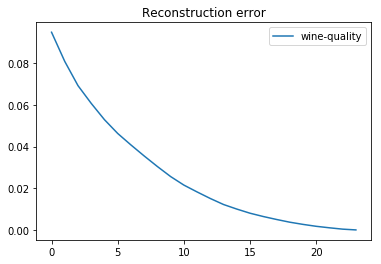

2
0


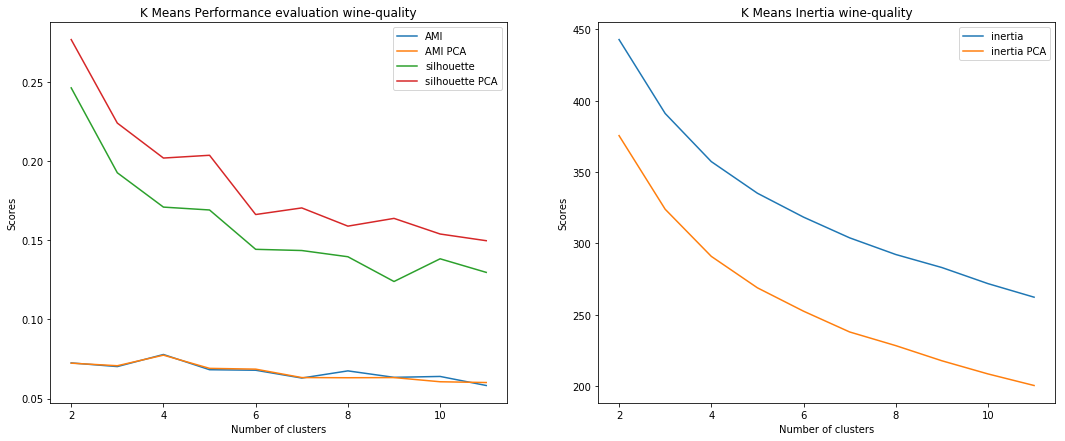

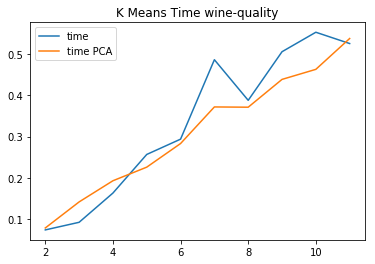

        AMI       ARI       NMI  accuracy  completeness  f1_score  homogenity  \
5  0.062941  0.042266  0.078396  0.170478      0.064847   0.21876    0.094775   

      inertia       init  mutual_info  n_clusters  precision    recall  \
5  303.884606  k-means++     0.122302           7    0.32078  0.170478   

   silhouette      time  v-measure  
5    0.143471  0.371563   0.077006  
------
        AMI       ARI       NMI  accuracy  completeness  f1_score  homogenity  \
5  0.063238  0.042281  0.078808  0.100041      0.065141  0.145278    0.095343   

      inertia       init  mutual_info  n_clusters  precision    recall  \
5  237.912902  k-means++     0.123034           7    0.27392  0.100041   

   silhouette      time  v-measure  
5    0.170376  0.485855     0.0774  
2
0


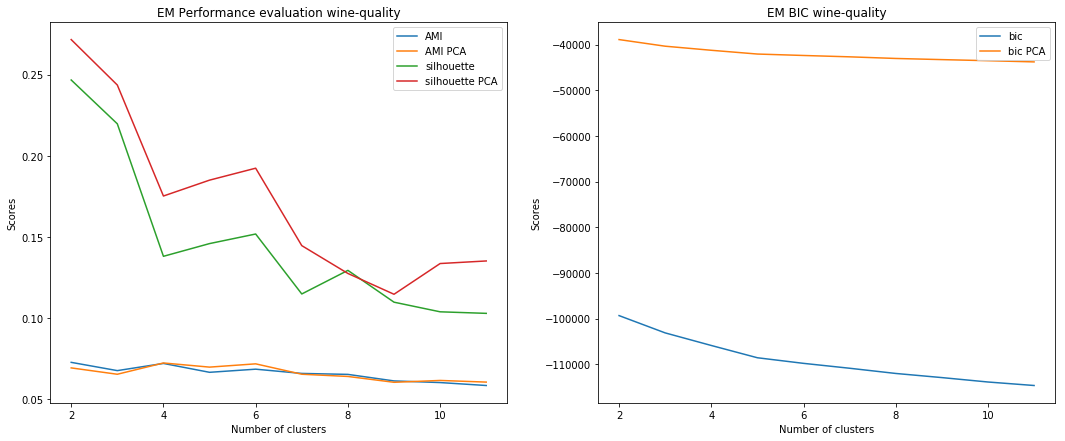

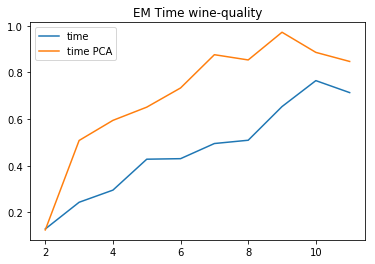

        AMI       ARI       NMI  accuracy            aic            bic  \
5  0.065826  0.042798  0.081983  0.171294 -111466.340671 -110881.648269   

   completeness  f1_score  homogenity    init  mutual_info  n_clusters  \
5       0.06772  0.224067     0.09925  gmm-em     0.128077           7   

   precision    recall  silhouette      time  v-measure  
5   0.333372  0.171294    0.114796  0.875706   0.080508  
------
        AMI       ARI       NMI  accuracy           aic           bic  \
5  0.065328  0.042313  0.080947  0.073091 -43043.724075 -42686.412052   

   completeness  f1_score  homogenity    init  mutual_info  n_clusters  \
5      0.067238  0.093392    0.097451  gmm-em     0.125755           7   

   precision    recall  silhouette      time  v-measure  
5   0.264285  0.073091     0.14458  0.495284   0.079573  


In [48]:

data = wdata
method = "PCA"

# Reconstruction Error
dfr = reconstruction_error(cdata)
dfr.to_csv(f"./results/rerror_{method.lower()}_{data['name']}.csv", index=False )
plot_reconstruction_error(dfr)
          
# Reduce dimension using PCA cdata
reduced_data = PCA(n_components=data['pca_n']).fit_transform(data['X'])
    
# Performances
n_clusters_range = list(range(2, data['n_features']+1))

## Kmeans
dfk = performance_k_means(reduced_data, 
                              data['y'], 
                              data['name'], 
                              n_clusters_range=n_clusters_range)
dfk.to_csv(f"./results/km_{method.lower()}_{data['name']}.csv", index=False )
reduced_data_k_means_perf(data, reduced_data, n_clusters_range, method=method)

## EM
dfe = performance_em(reduced_data, 
                              data['y'], 
                              data['name'], 
                              n_clusters_range=n_clusters_range)
dfe.to_csv(f"./results/em_{method.lower()}_{data['name']}.csv", index=False )
reduced_data_em_perf(data, reduced_data, n_clusters_range, method=method)
